# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100) #0到5等距生成數字
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100) #加入noise

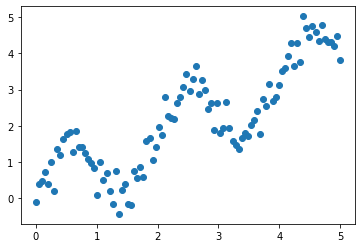

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100,)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5153285399549586


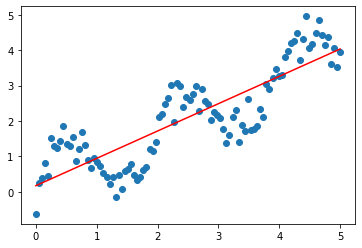

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [18]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [19]:
regr_poly = LinearRegression()

In [20]:
regr_poly.fit(X_poly, y)

LinearRegression()

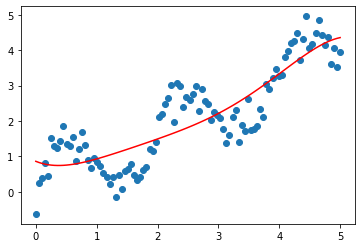

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [22]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-0.70009531  1.22959098 -0.58426163  0.13365799 -0.01095845]
interception:  0.8602134972734636


In [23]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b    #.T代表轉置矩陣

array([0.8602135 , 0.82791714, 0.80145402, 0.7804033 , 0.76436414,
       0.75295528, 0.7458146 , 0.74259869, 0.74298243, 0.74665853,
       0.75333712, 0.76274531, 0.77462676, 0.78874127, 0.80486428,
       0.82278652, 0.84231354, 0.86326526, 0.88547556, 0.90879187,
       0.93307469, 0.95819718, 0.98404474, 1.01051455, 1.03751519,
       1.06496612, 1.09279735, 1.12094893, 1.14937055, 1.17802111,
       1.20686828, 1.23588805, 1.26506436, 1.29438859, 1.32385917,
       1.35348115, 1.38326576, 1.41322996, 1.44339604, 1.47379116,
       1.50444696, 1.53539906, 1.56668669, 1.59835222, 1.63044076,
       1.6629997 , 1.69607828, 1.72972718, 1.76399807, 1.79894317,
       1.83461484, 1.87106513, 1.90834537, 1.94650571, 1.98559471,
       2.02565888, 2.06674228, 2.10888609, 2.15212813, 2.19650248,
       2.24203903, 2.28876303, 2.3366947 , 2.38584875, 2.43623397,
       2.48785281, 2.54070092, 2.59476675, 2.6500311 , 2.70646667,
       2.76403766, 2.82269934, 2.88239757, 2.94306842, 3.00463

In [24]:
regr_poly.predict(X_poly)

array([0.8602135 , 0.82791714, 0.80145402, 0.7804033 , 0.76436414,
       0.75295528, 0.7458146 , 0.74259869, 0.74298243, 0.74665853,
       0.75333712, 0.76274531, 0.77462676, 0.78874127, 0.80486428,
       0.82278652, 0.84231354, 0.86326526, 0.88547556, 0.90879187,
       0.93307469, 0.95819718, 0.98404474, 1.01051455, 1.03751519,
       1.06496612, 1.09279735, 1.12094893, 1.14937055, 1.17802111,
       1.20686828, 1.23588805, 1.26506436, 1.29438859, 1.32385917,
       1.35348115, 1.38326576, 1.41322996, 1.44339604, 1.47379116,
       1.50444696, 1.53539906, 1.56668669, 1.59835222, 1.63044076,
       1.6629997 , 1.69607828, 1.72972718, 1.76399807, 1.79894317,
       1.83461484, 1.87106513, 1.90834537, 1.94650571, 1.98559471,
       2.02565888, 2.06674228, 2.10888609, 2.15212813, 2.19650248,
       2.24203903, 2.28876303, 2.3366947 , 2.38584875, 2.43623397,
       2.48785281, 2.54070092, 2.59476675, 2.6500311 , 2.70646667,
       2.76403766, 2.82269934, 2.88239757, 2.94306842, 3.00463

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [25]:
# normal distrubution 估計為常態分佈
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [26]:
sigma = 0.3

In [27]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [28]:
regr_rbf = LinearRegression()

In [29]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

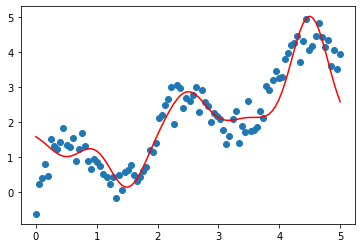

In [30]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [31]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.75120917 -1.63575988  1.10759319  0.34699583  3.26271194]
interception:  1.7711819109917148


#### Comparison

In [32]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

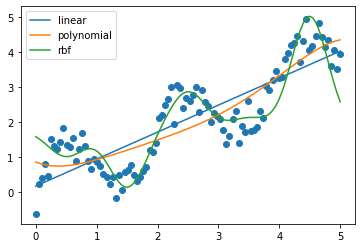

In [33]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [34]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5153285399549586


In [35]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.45227631684586017


In [36]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2882419721712885
